In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [0]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'glacier': 
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): 
            image = cv2.imread(directory+labels+r'/'+image_file) 
            image = cv2.resize(image,(150,150)) 
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) 

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [0]:
Images, Labels = get_images('drive/My Drive/seg_train/') 

Images = np.array(Images) 
Labels = np.array(Labels)

In [0]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (7534, 150, 150, 3)
Shape of Labels: (7534,)


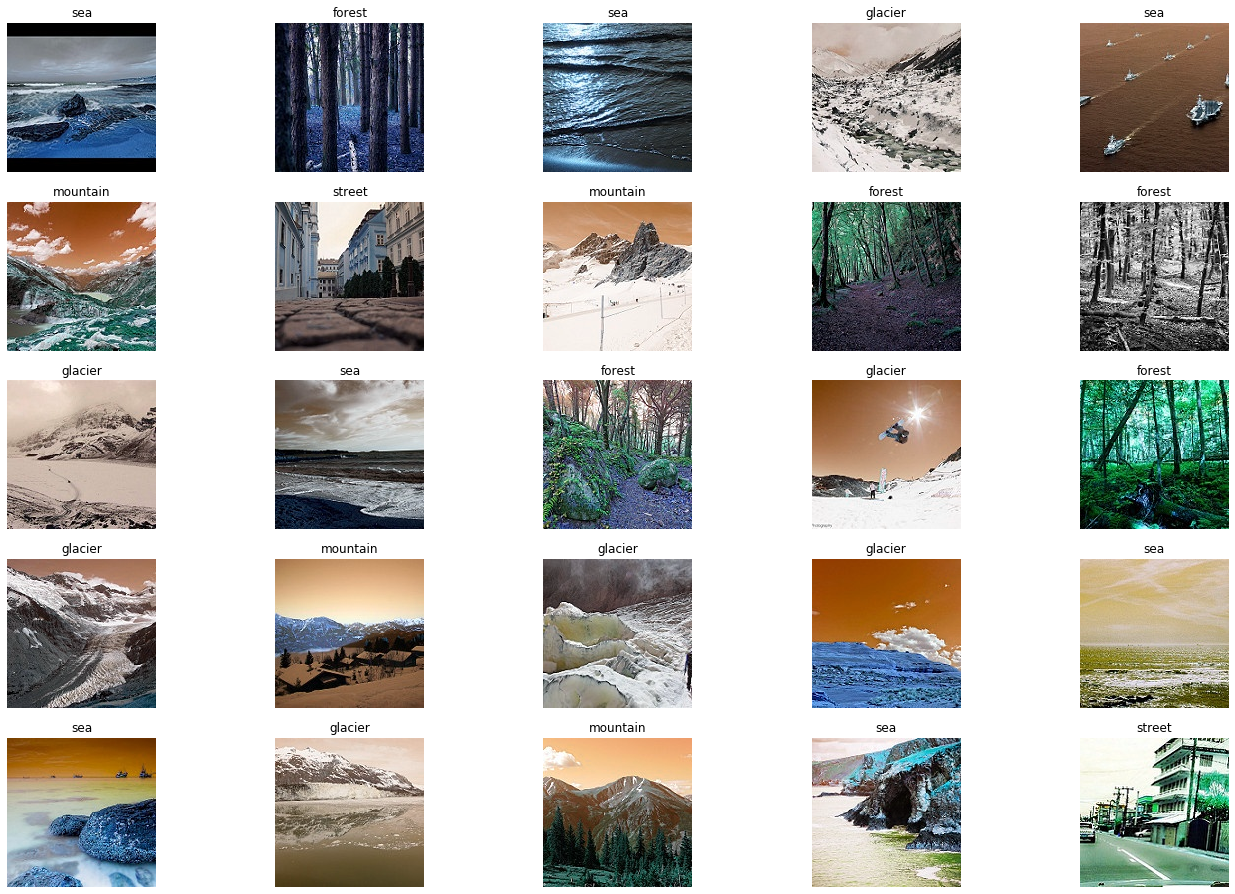

In [0]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
#model = Models.Sequential()
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(5,5))
model.add(keras.layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(5,5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(180,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 50)       

TypeError: ignored

In [0]:
trained = model.fit(Images,Labels,epochs=15,validation_split=0.30)

Train on 5273 samples, validate on 2261 samples
Epoch 1/15
5273/5273 [==============================] - 111s 21ms/sample - loss: 1.6857 - acc: 0.3042 - val_loss: 1.3335 - val_acc: 0.4480
Epoch 2/15
5273/5273 [==============================] - 99s 19ms/sample - loss: 1.3630 - acc: 0.4506 - val_loss: 1.1563 - val_acc: 0.5670
Epoch 3/15
5273/5273 [==============================] - 99s 19ms/sample - loss: 1.2214 - acc: 0.5109 - val_loss: 1.1602 - val_acc: 0.5480
Epoch 4/15
5273/5273 [==============================] - 99s 19ms/sample - loss: 1.1382 - acc: 0.5572 - val_loss: 0.9946 - val_acc: 0.6179
Epoch 5/15
5273/5273 [==============================] - 99s 19ms/sample - loss: 1.0660 - acc: 0.5890 - val_loss: 0.9081 - val_acc: 0.6630
Epoch 6/15
5273/5273 [==============================] - 99s 19ms/sample - loss: 1.0062 - acc: 0.6110 - val_loss: 0.8551 - val_acc: 0.6970
Epoch 7/15
5273/5273 [==============================] - 99s 19ms/sample - loss: 0.9269 - acc: 0.6526 - val_loss: 0.7756 - v

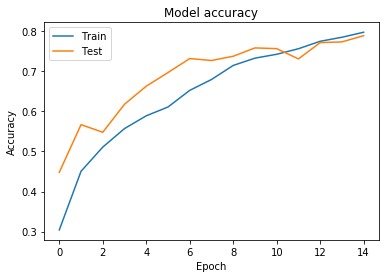

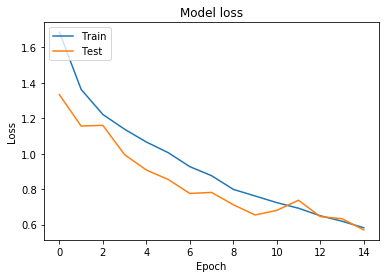

In [0]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
test_images,test_labels = get_images('drive/My Drive/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3087/3087 [==============================] - 16s 5ms/sample - loss: 0.5592 - acc: 0.8173


[0.5592239384594032, 0.81729835]

In [0]:

pred_images,no_labels = get_images('drive/My Drive/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(33, 150, 150, 3)

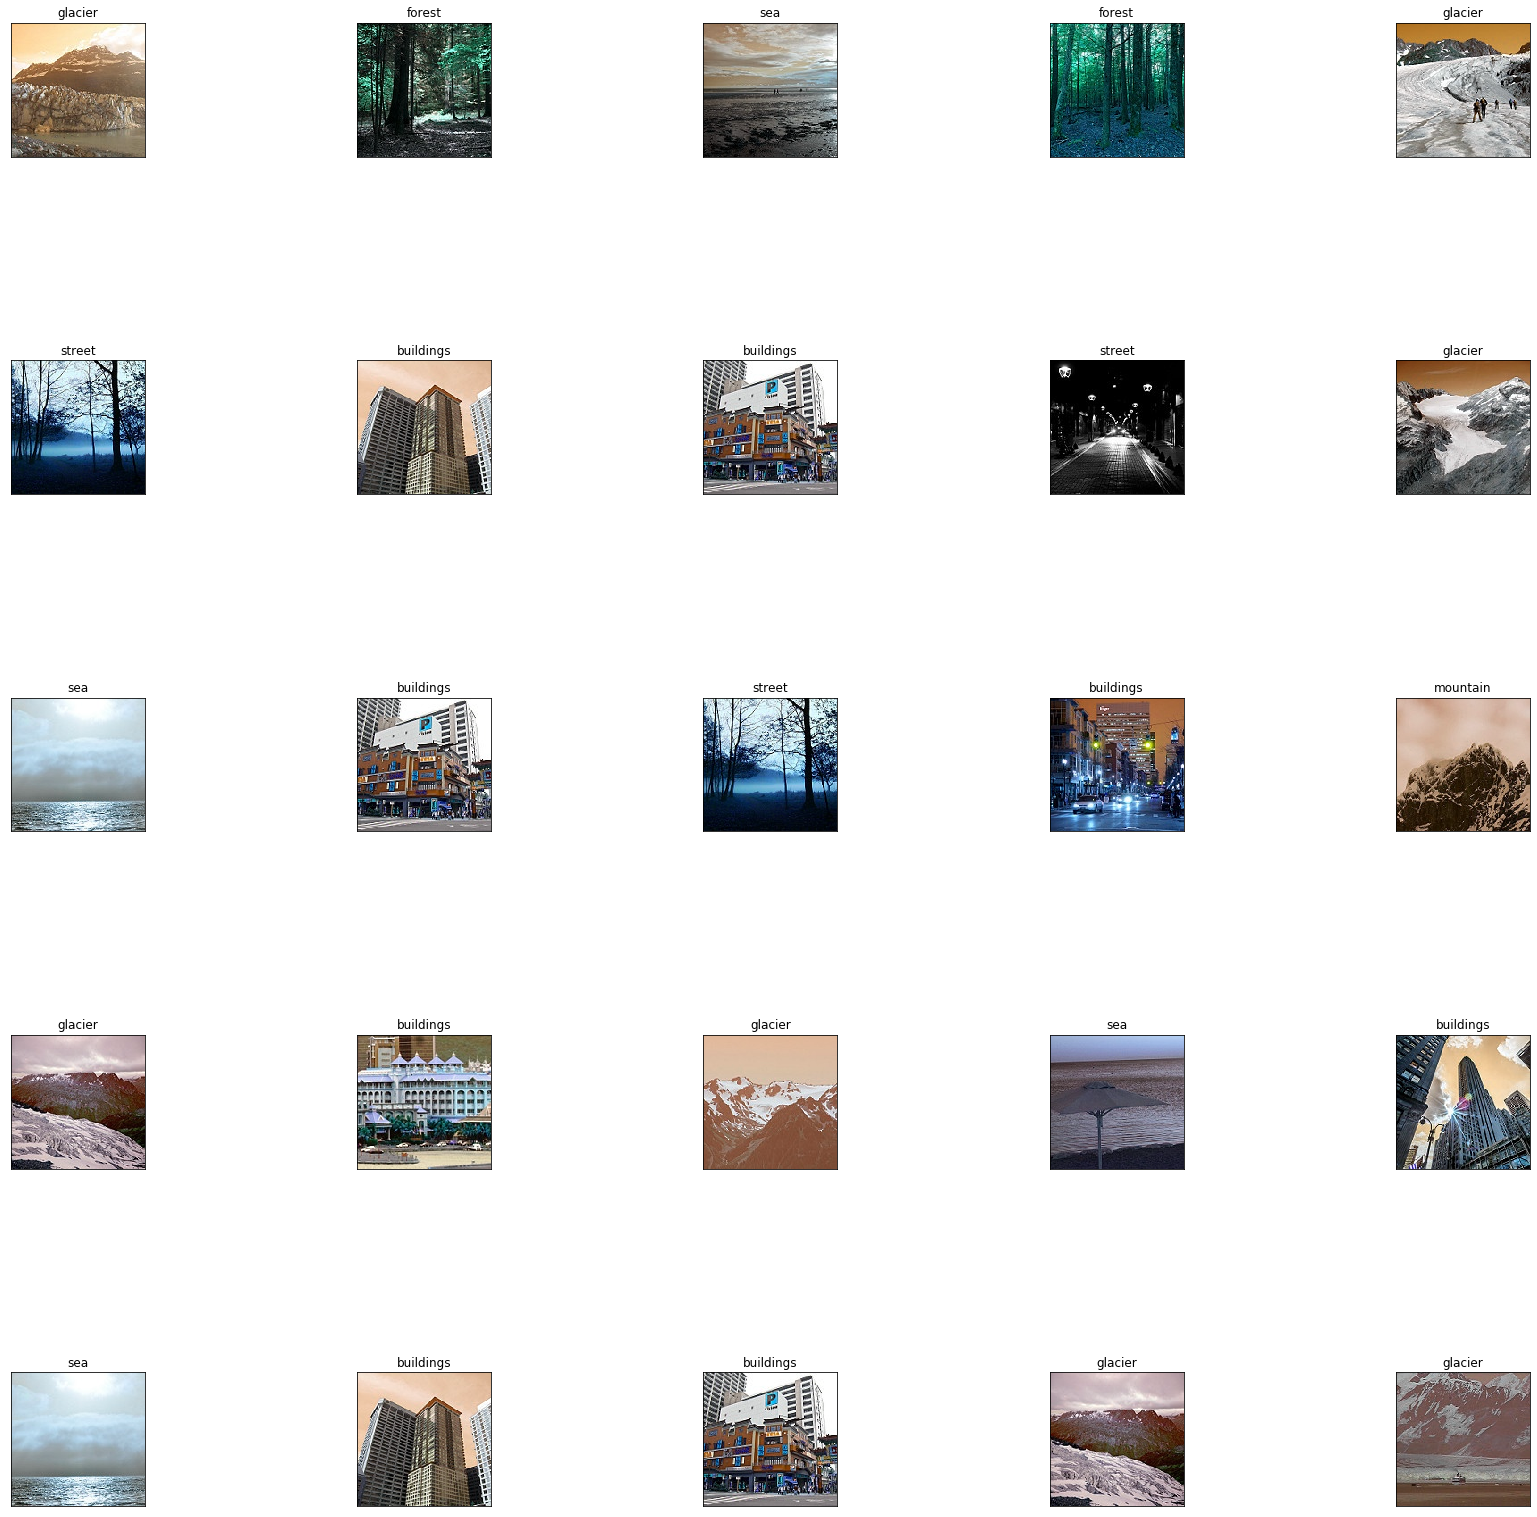

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)
for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            #ax.bar([0,1,2,3,4,5],pred_prob)
            #fig.add_subplot(ax)
fig.show()